In [47]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [ ]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [4]:
reviews_df=pd.read_csv('Amazon_Reviews.csv')

y=reviews_df['Label']

reviews_df.drop(columns='Label',inplace=True)

reviews_df

,Review
0,Stuning even for the non-gamer: This sound tr...
1,The best soundtrack ever to anything.: I'm re...
2,Amazing!: This soundtrack is my favorite musi...
3,Excellent Soundtrack: I truly like this sound...
4,"Remember, Pull Your Jaw Off The Floor After H..."
...,...
194,A Book That Is Worth a Second Look: This book...
195,Best game ever: This games makes even amazing...
196,Guitar in Absentia: With all due respect to a...
197,Stiff and Smells like drying paint: You get w...


In [7]:
regex_tokenizer=RegexpTokenizer(r'\w+')

lemmatizer=WordNetLemmatizer()

#stemmer=PorterStemmer()

tdidf=TfidfVectorizer()

stopwords_en=stopwords.words('english')

In [13]:
lemmatizer.lemmatize('playing',pos = 'v')


'play'

In [15]:
stopwords_en

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [10]:
def preprocessing(text):
    
    tokens=regex_tokenizer.tokenize(text)
    
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords_en]
    
    lemmatized_tokens=[lemmatizer.lemmatize(pure_token,pos = 'v') for pure_token in pure_tokens]
    
    return ' '.join(lemmatized_tokens)
    
preprocessing('This is the last movie i will be watching')
    
    

'last movie watch'

In [17]:
X_train,X_test,y_train,y_test=train_test_split(reviews_df,y,test_size=0.2,random_state=42)

In [19]:
X_train['Cleaned_text']= X_train['Review'].apply(preprocessing)
X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)

In [20]:
Xtrain_tfidf_matrix=tdidf.fit_transform(X_train['Cleaned_text'])

Xtest_tfidf_matrix=tdidf.transform(X_test['Cleaned_text'])

In [23]:
Xtrain_tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
159*2348

373332

In [27]:
from sklearn.naive_bayes import MultinomialNB #GaussianNB,BernoulliNB

mnb=MultinomialNB()

mnb.fit(Xtrain_tfidf_matrix.toarray(),y_train)

predictions=mnb.predict(Xtest_tfidf_matrix.toarray())

predictions

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score


print(confusion_matrix(y_test,predictions))

print(precision_score(y_test,predictions))

print(recall_score(y_test,predictions))

print(f1_score(y_test,predictions))

[[ 9  6]
 [ 2 23]]
0.7931034482758621
0.92
0.8518518518518519


Text(0.5, 1.0, 'Confusion_matrix')

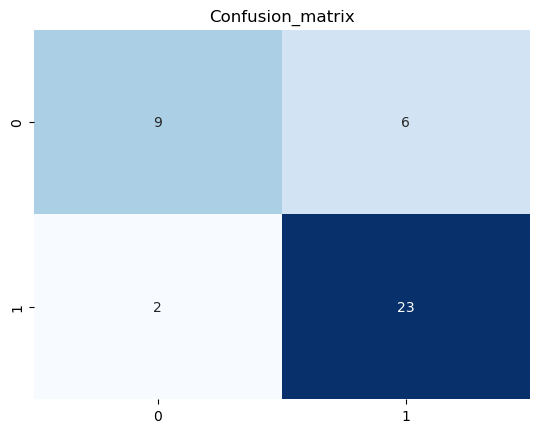

In [49]:
cm = confusion_matrix(y_test,predictions )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion_matrix")